## Linear Model

In [2]:
# pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/11/c5/2370d96b31eb1841c3a0883a492c15278a6718ccad61bb6a649c80d1d9eb/torch-2.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/204.2 MB 8.3 MB/s eta 0:00:25
   ---------------------------------------- 0.8/204.2 MB 8.3 MB/s eta 0:00:25
   ---------------------------------------- 1.4/204.2 MB 9.7 MB/s eta 0:00:21
   ---------------------------------------- 1.8/204.2 MB 9.

In [1]:
import torch 
import torch.nn as nn

C:\Users\ssowl\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:
layer = nn.Linear(in_features = 8, out_features = 4)

In [4]:
x = torch.randn(2, 8) # 8 inputs 
y = layer(x)
y # 4 outputs

tensor([[ 0.6274,  0.0782,  0.9948,  0.2522],
        [-0.0091,  0.3533, -0.3771,  0.0579]], grad_fn=<AddmmBackward0>)

In [6]:
relu = nn.ReLU()
softmax = nn.Softmax()

In [7]:
x = torch.randn(1, 4)
y = relu(x)

print(f"input: {x}")
print(f"output: {y}") # values smaller than 0 turn into 0

input: tensor([[-0.9210, -1.2969,  0.4399,  0.9479]])
output: tensor([[0.0000, 0.0000, 0.4399, 0.9479]])


In [8]:
loss_mse = nn.MSELoss()
loss_ce = nn.CrossEntropyLoss()

## Make a Model (__init__)

In [9]:
class MyModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.linear0 = nn.Linear(8, 4)
        self.linear1 = nn.Linear(4, 6)
        self.linear2 = nn.Linear(6, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        # h0_0 = self.linear0(x)
        # h0_1 = self.relu(h0_0)

        # h1_0 = self.linear1(h0_1)
        # h1_1 = self.relu(h1_0)

        # y = self.linear2(h1_1)

        x = self.relu(self.linear0(x))
        x = self.relu(self.linear1(x))
        y = self.linear2(x)

        return y

In [10]:
model = MyModel()

input_tensor = torch.randn(2, 8)
result = model(input_tensor)
result

tensor([[ 0.0111,  0.2335,  0.0330],
        [-0.0885,  0.2036,  0.1436]], grad_fn=<AddmmBackward0>)

In [11]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = MyModel()
        self.layer = nn.Linear(3, 4)

    def forward(self, x):
        x = self.block(x)
        y = self.layer(x)
        return y

In [12]:
model2 = MyModel2()

input_tensor = torch.randn(2, 8)
result = model2(input_tensor)
result

tensor([[-0.6280, -0.1299,  0.2787, -0.6091],
        [-0.6327, -0.1305,  0.2752, -0.6041]], grad_fn=<AddmmBackward0>)

## Make a Model (nn.Sequential)

In [13]:
model = nn.Sequential(
    nn.Linear(8, 4), 
    nn.ReLU(), 
    nn.Linear(4, 6), 
    nn.ReLU(), 
    nn.Linear(6, 3),
)

In [14]:
class MyModelWithSequential(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(8, 4),
            nn.ReLU(), 
            nn.Linear(4, 6), 
            nn.ReLU(), 
            nn.Linear(6, 3),
        )
        self.layer = nn.Linear(3, 4)
        
    def forward(self, x):
        x = self.block(x)
        y = self.layer(x)
        return y

## Make Complex a Model (nn.Sequential)

In [2]:
class ComplexModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear0_0 = nn.Linear(4, 8)
        self.linear0_1 = nn.Linear(6, 4)
        self.linear1_0 = nn.Linear(14, 8)
        self.linear1_1 = nn.Linear(14, 2)
        self.relu = nn.ReLU()

    def forward(self, input0, input1, input2):
        h0_0 = self.relu(self.linear0_0(input0))
        h0_1 = self.relu(self.linear0_1(input1))

        h1 = torch.cat([h0_0, h0_1, input2], dim=1)

        output0 = self.linear1_0(h1)
        output1 = self.linear1_1(h1)

        return output0, output1

In [3]:
model = ComplexModel()
x0 = torch.randn(2, 4)
x1 = torch.randn(2, 6)
x2 = torch.randn(2, 2)

y0, y1 = model(x0, x1, x2)

In [4]:
y0.size()

torch.Size([2, 8])

In [5]:
y1.size()

torch.Size([2, 2])

## Check Model Infomation (nn.Sequential)

In [6]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear0 = nn.Linear(8, 4)
        self.linear1 = nn.Linear(4, 6)
        self.linear2 = nn.Linear(6, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear0(x))
        x = self.relu(self.linear1(x))
        y = self.linear2(x)

        return y

model = MyModel()

In [7]:
print(model)

MyModel(
  (linear0): Linear(in_features=8, out_features=4, bias=True)
  (linear1): Linear(in_features=4, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
)


In [8]:
for named_child in model.named_children():
    print(named_child)

('linear0', Linear(in_features=8, out_features=4, bias=True))
('linear1', Linear(in_features=4, out_features=6, bias=True))
('linear2', Linear(in_features=6, out_features=3, bias=True))
('relu', ReLU())


In [9]:
for named_param in model.named_parameters():
    print(named_param)
    print()

('linear0.weight', Parameter containing:
tensor([[ 0.2770,  0.1784,  0.1489, -0.3435, -0.0125,  0.1273,  0.2739,  0.1007],
        [ 0.1199, -0.0978,  0.3336,  0.0397, -0.2335, -0.1301, -0.0599,  0.2563],
        [-0.2838,  0.0783,  0.2368, -0.0486, -0.0953,  0.2372, -0.1556,  0.0007],
        [-0.2934,  0.0283, -0.1125, -0.3481, -0.3209,  0.3482, -0.2390,  0.3095]],
       requires_grad=True))

('linear0.bias', Parameter containing:
tensor([-0.3476,  0.3099,  0.1911, -0.3517], requires_grad=True))

('linear1.weight', Parameter containing:
tensor([[-0.3618,  0.3400, -0.0706, -0.0617],
        [-0.2940,  0.0476, -0.0294, -0.2330],
        [-0.0521,  0.1026, -0.1897, -0.1929],
        [ 0.1106,  0.2663, -0.3525, -0.3311],
        [-0.1750,  0.2966, -0.3786,  0.1711],
        [-0.0941,  0.1461,  0.4915, -0.1363]], requires_grad=True))

('linear1.bias', Parameter containing:
tensor([-0.0409,  0.3356, -0.4287,  0.1554,  0.2960, -0.4263],
       requires_grad=True))

('linear2.weight', Param

In [10]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = MyModel()
        self.linear = nn.Linear(3, 4)

    def forward(self, x):
        x = self.block(x)
        return self.linear(x)

model2 = MyModel2()

In [11]:
for named_child in model2.named_children():
    print(named_child)

('block', MyModel(
  (linear0): Linear(in_features=8, out_features=4, bias=True)
  (linear1): Linear(in_features=4, out_features=6, bias=True)
  (linear2): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
))
('linear', Linear(in_features=3, out_features=4, bias=True))


In [12]:
for named_param in model2.named_parameters():
    print(named_param)
    print()

('block.linear0.weight', Parameter containing:
tensor([[ 0.2361,  0.0564,  0.2037,  0.0916,  0.1796,  0.3311, -0.0399,  0.2187],
        [-0.1947,  0.0354,  0.3206, -0.1061, -0.0359, -0.3040, -0.1497, -0.1477],
        [-0.2335, -0.3117, -0.0945, -0.1806, -0.0810, -0.3206,  0.2497,  0.1511],
        [-0.0642, -0.3020,  0.0191, -0.2531, -0.0419,  0.0546, -0.0132,  0.3355]],
       requires_grad=True))

('block.linear0.bias', Parameter containing:
tensor([-0.2576,  0.3021,  0.2868,  0.2401], requires_grad=True))

('block.linear1.weight', Parameter containing:
tensor([[ 0.2543,  0.0836,  0.0148,  0.4932],
        [-0.3593, -0.1779,  0.1733, -0.3796],
        [ 0.1317,  0.0782, -0.3832,  0.3054],
        [ 0.0899,  0.0939, -0.3598, -0.4862],
        [-0.0219, -0.4076, -0.2728, -0.3340],
        [ 0.0251, -0.4271, -0.3045, -0.2209]], requires_grad=True))

('block.linear1.bias', Parameter containing:
tensor([0.4433, 0.3166, 0.0705, 0.4185, 0.1716, 0.0845], requires_grad=True))

('block.linea

## Training Loop

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

In [15]:
# 데이터 불러오기
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

# 입력과 타깃 나누기
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

# 데이터셋 클래스 정의
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index], dtype=torch.float32)
        target_tensor = torch.tensor(self.target_data[index], dtype=torch.float32)

        return input_tensor, target_tensor

# 학습/검증/테스트 분할
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size:train_size + val_size]
val_targets = target_data[train_size:train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

# 표준화
scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

# 데이터셋 만들기
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)

# 데이터로더 만들기
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)

In [33]:
# 모델 클래스 정의
class AbaloneModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

In [34]:
model = AbaloneModel()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

AbaloneModel(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [36]:
epochs = 10
step = 0
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        x_train, y_train = train_batch
        pred = model(x_train).squeeze()
        loss = loss_fn(pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        step += 1

        if step % 100 == 0:
            print(f'step {step}, train loss: {loss.item():.4f}')

    model.eval()
    with torch.no_grad():
        losses = []
        for val_batch in val_dataloader:
            x_val, y_val = val_batch[0].to(device), val_batch[1].to(device)
            pred = model(x_val).squeeze()
            loss = loss_fn(pred, y_val)
            losses.append(loss.item())

        val_loss_avg = sum(losses) / len(losses)
        print(f'epoch {epoch+1}/{epochs}, validation loss: {val_loss_avg:.4f}\n')
        

epoch 1/10, validation loss: 4.7844

step 100, train loss: 13.0498
epoch 2/10, validation loss: 4.8815

step 200, train loss: 9.8965
epoch 3/10, validation loss: 4.8912

step 300, train loss: 10.2055
epoch 4/10, validation loss: 5.1687

step 400, train loss: 11.5745
epoch 5/10, validation loss: 5.1890

epoch 6/10, validation loss: 4.7377

step 500, train loss: 9.7996
epoch 7/10, validation loss: 4.5258

step 600, train loss: 4.2296
epoch 8/10, validation loss: 4.6514

step 700, train loss: 11.5285
epoch 9/10, validation loss: 4.4120

step 800, train loss: 10.5671
epoch 10/10, validation loss: 4.3371



In [37]:
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adagrad(model.parameters(), lr=0.01)
# optimizer = optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)
# optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

In [38]:
model.eval()
with torch.no_grad():
    losses = []
    preds = []
    targets = []
    for test_batch in test_dataloader:
        x_test, y_test = test_batch[0].to(device), test_batch[1].to(device)
        pred = model(x_test).squeeze()
        loss = loss_fn(pred, y_test)
        losses.append(loss.item())

        preds.extend(pred.cpu().numpy())
        targets.extend(y_test.cpu().numpy())

    test_loss_avg = sum(losses) / len(losses)
    print(f'test loss: {test_loss_avg:.4f}\n')

test loss: 6.7928



In [39]:
print(f'val RMSE: {np.sqrt(val_loss_avg):.4f}')
print(f'val RMSE: {np.sqrt(test_loss_avg):.4f}')

val RMSE: 2.0826
val RMSE: 2.6063


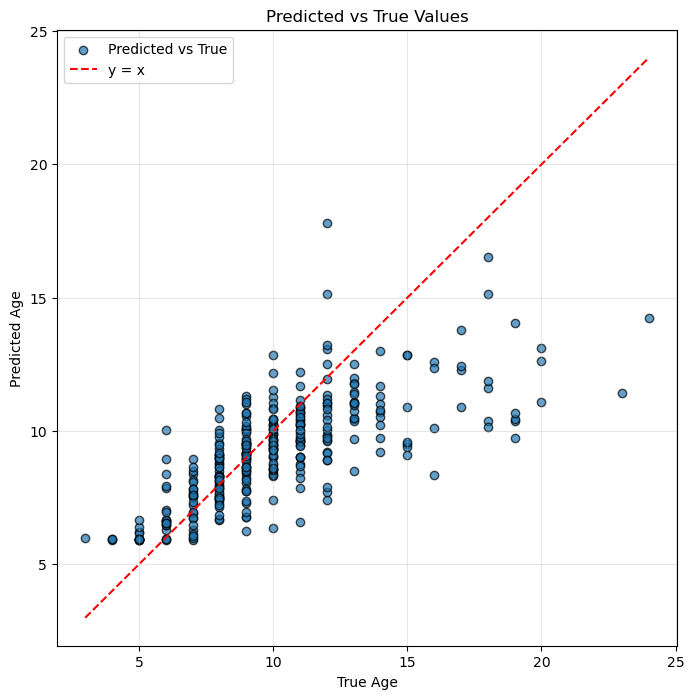

In [40]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(8, 8))
plt.scatter(targets, preds, alpha=0.7, label='Predicted vs True', edgecolor='k')

# 비교를 위한 y = x 직선 그리기
min_val = min(min(targets), min(preds))
max_val = max(max(targets), max(preds))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x')

# 레이블 및 범례
plt.title('Predicted vs True Values')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Save and Read Models

In [45]:
torch.save(model.state_dict(), 'model.pth')

In [46]:
state_dict_loaded = torch.load('model.pth', weights_only=True)

In [48]:
model_loaded = AbaloneModel()
model_loaded.load_state_dict(state_dict_loaded)

<All keys matched successfully>

In [49]:
model_loaded.to(device)
model.eval()
model_loaded.eval()

for test_batch in test_dataloader:
    x_test, y_test = test_batch[0].to(device), test_batch[1].to(device)
    pred_org = model(x_test)
    pred_loaded = model_loaded(x_test)

    print(torch.equal(pred_org, pred_loaded))
    break

True
